**Lets** staring working with dog vision dataset using tensorflow 2.0

## Features

Lets get to know about the dataset:


1.  We care dealing with images i.e. unstructured data using transfer/deep learning
2.  There are 120 breeds of dogs (i.e. there are 120 different classes.)
3. There are around 10,000+ images in training set (these images have labels).
4. There are 10,000 images in test set (they wont have no labels as we need to predict them).










## **Import tensorflow library package**

In [ ]:
import tensorflow as tf
print("TF VERSION : ",tf.__version__)

TF VERSION :  2.12.0


# Necessary Packages need to be there:

1.  tensorflow 2.0
2.  tensorflow hub
3.  Using gpu






In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
print("TF Version: ",tf.__version__)
print("Hub version: ",hub.__version__)
import pandas as pd
# To check the gpu there or not

print("GPU","available :)))" if tf.config.list_physical_devices('GPU') else "not available :(((")

# Lets Start working the our data
1. Here in order to work with tensorflow we need to convert the given input in form of tensors i.e. we need to have numerical representations.

First Lets load the labels

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dog-vision/labels.csv')
print(df.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [ ]:
df.head(20)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


Lets analyze the no. of datas based on breeds

In [ ]:
df['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

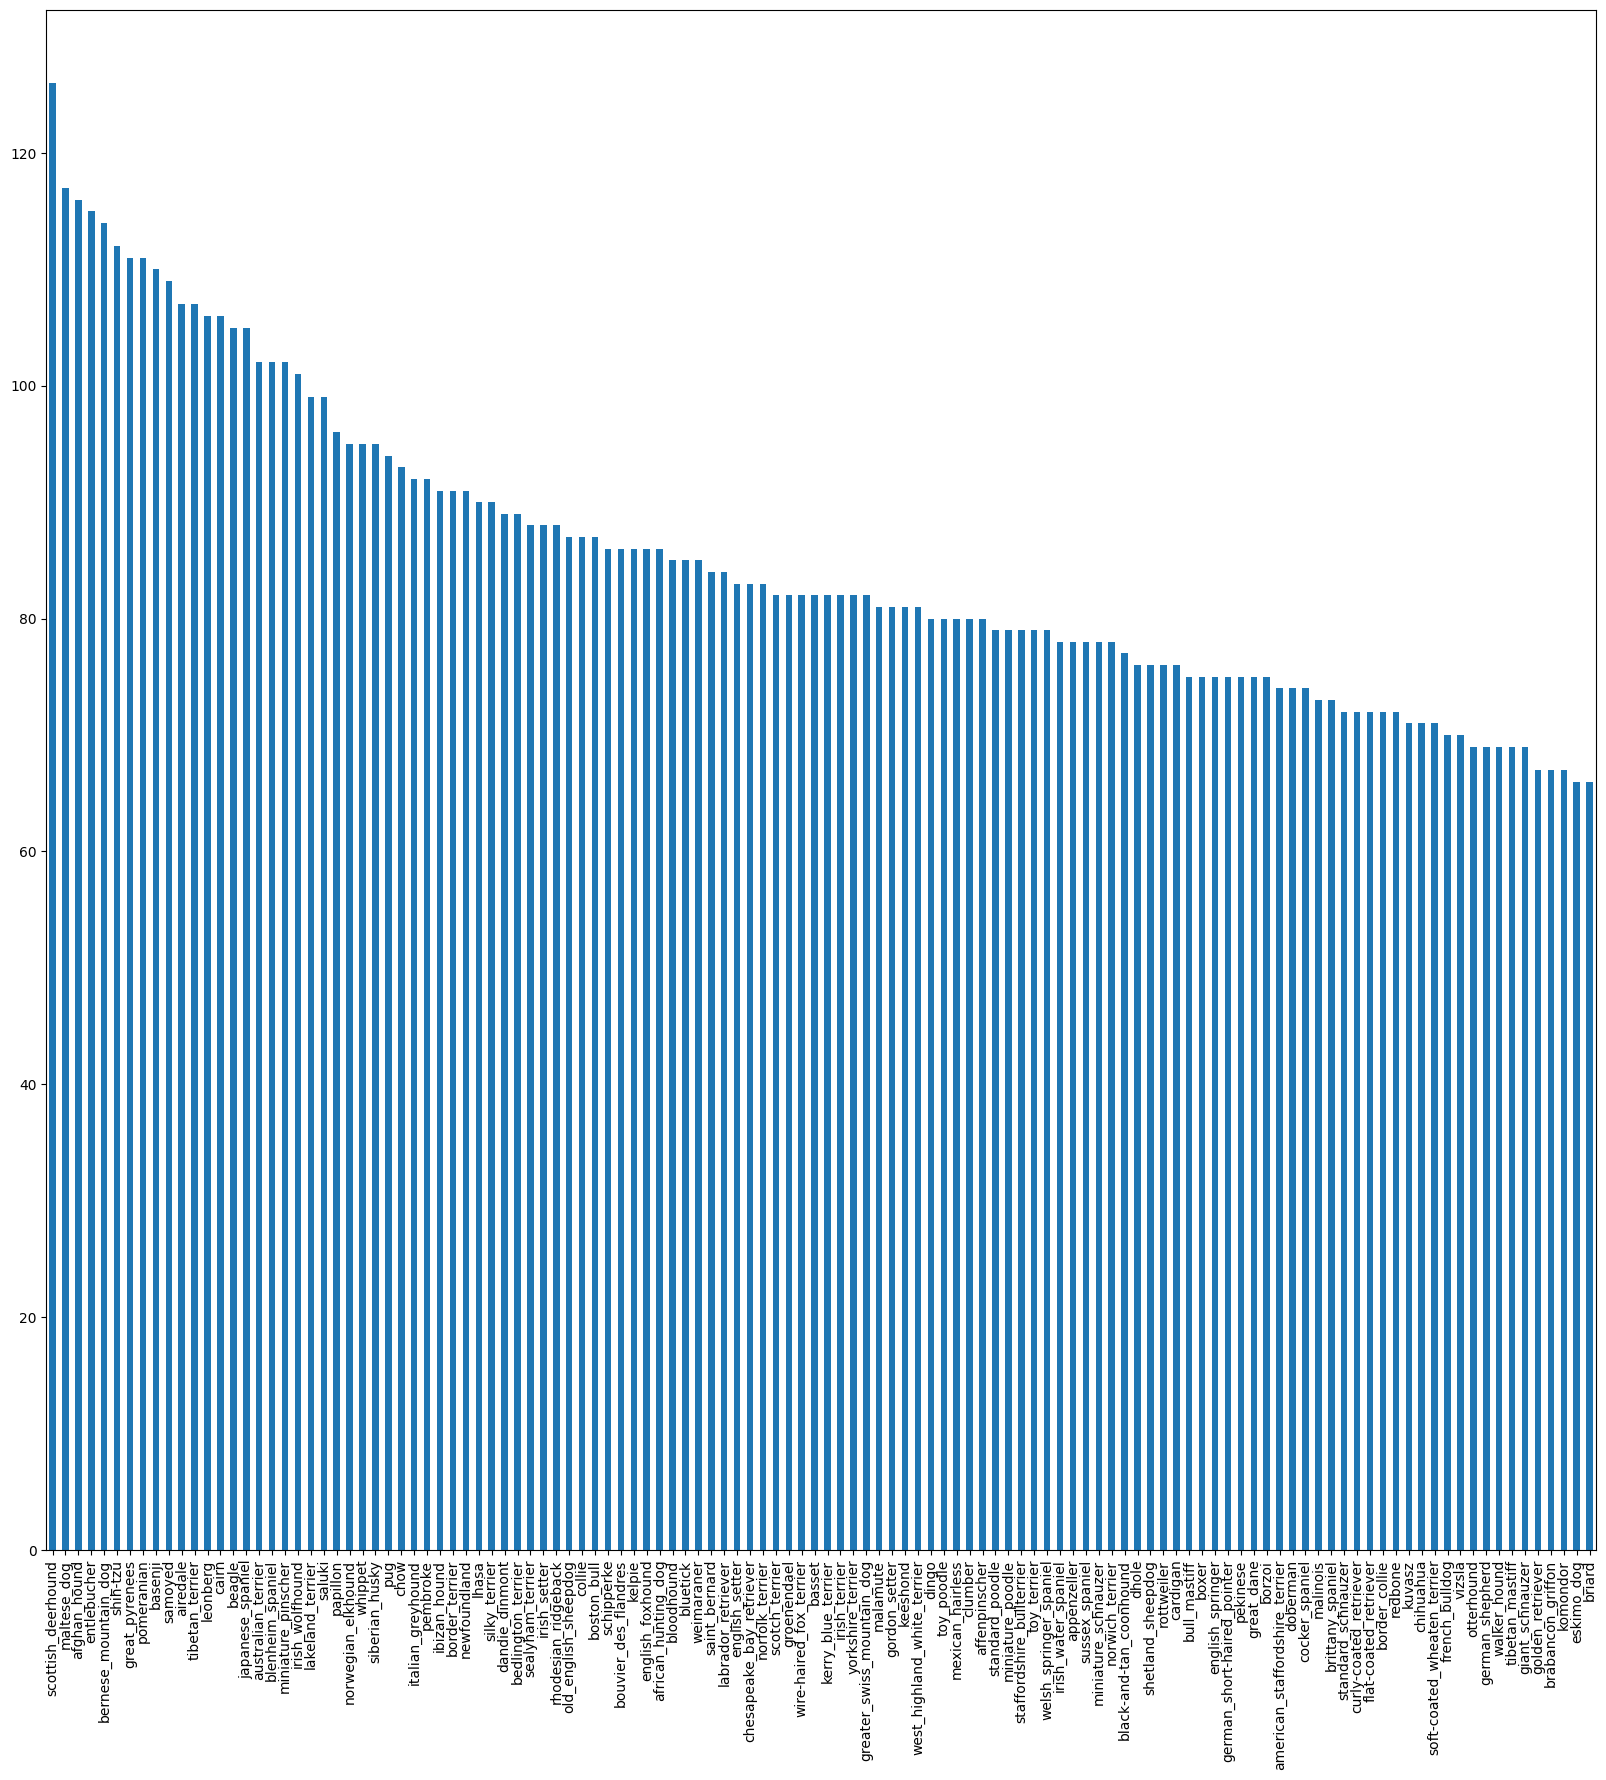

In [ ]:
df['breed'].value_counts().plot.bar(figsize=(20,20))

In [ ]:
df['breed'].value_counts().median()

82.0

# To display the image
We need to use Ipython package

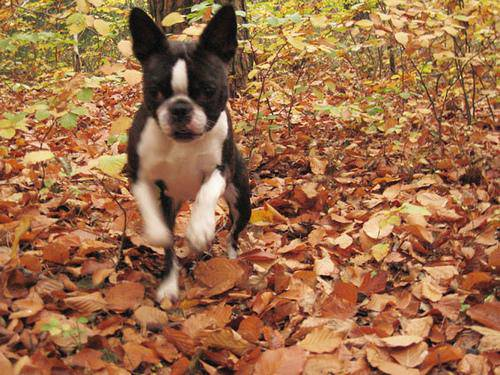

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In order to create filenames as path need to be added so .....

In [ ]:
filenames=[fname for fname in df['id']]
filenames[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
filenames=['/content/drive/MyDrive/dog-vision/train/'+fname+'.jpg' for fname in df['id']]
filenames[:10]

['/content/drive/MyDrive/dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

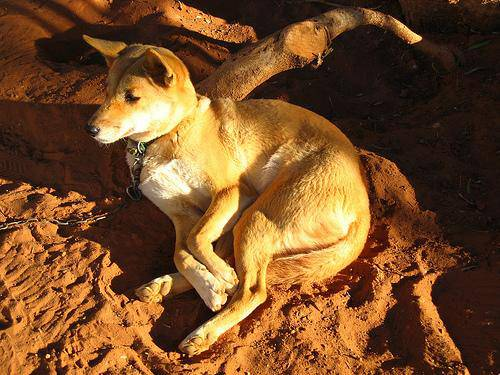

In [ ]:
Image(filenames[1])

Now the next step is to check whether the length of the data in filenames matches the given number of data in train dataset

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/dog-vision/train'))

10222

In [ ]:
if len(os.listdir('/content/drive/MyDrive/dog-vision/train')) == len(filenames):
  print("yes both the datas are equal :))))")
else:
  print("no datas are not equal :((")

yes both the datas are equal :))))


In [ ]:
len(filenames)

10222

## Now the next step is to convert the given filenames into numbers

In [ ]:
labels=df['breed']
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [ ]:
import numpy as np

In [ ]:
labels=np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
## Now we need to check whether the labels matches the filenames

if len(labels)==len(filenames):
  print('Labels are matched u can go ahead')
else:
  print('Labels are not matched so check the directories')

Labels are matched u can go ahead


In [ ]:
## Now we need to find the unique breeds

unique_breed=np.unique(labels)
unique_breed

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breed)

120

In [ ]:
## Lets convert the unique breeds into boolean array
print(labels[0])
print(labels[0]==unique_breed)

boston_bull
[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [ ]:
 ## Lets convert them for all the labels
 boolean_arrays=[label==unique_breed for label in labels]
 boolean_arrays[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_arrays)

10222

In [ ]:
## Lets check whether it matches with given filenames or not
if len(boolean_arrays)==len(filenames):
  print('array got matched with the number of filenames')
else:
  print('doesnt match so pls check them !!')

array got matched with the number of filenames


In [ ]:
## Lets convert them into numbers

print(labels[0])
print(np.where(labels[0]==unique_breed)) ## it tells the index where labels matches the unique breed i.e. 1 in the array
print(boolean_arrays[0].astype(int)) # this converts the given boolean array into an integer array
print(boolean_arrays[0].argmax()) # it returns the position of the 1 in the boolean array

boston_bull
(array([19]),)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
19


# Creating a validation dataset

In [ ]:
# lets take 1000 images for experimenting and can be increased furthur in future
x=filenames
y=boolean_arrays


In [ ]:
NUM_IMAGES=1000 #@param {type:'slider',min:1000,max:10000,step:1000}

In [ ]:
## Lets split the validation dataset
from sklearn.model_selection import train_test_split
np.random.seed(42)
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)

In [ ]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [ ]:
x_train[:5],y_train[:5]

(['/content/drive/MyDrive/dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '/content/drive/MyDrive/dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  '/content/drive/MyDrive/dog-vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  '/content/drive/MyDrive/dog-vision/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  '/content/drive/MyDrive/dog-vision/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fals

# Preprocessing Images (converting images into tensors)

There are few things that need to be followed in the function:
1. Take an filepath as input
2. use tensorflow to read the image and store them in variable `image`
3. Turn our `images ` into tensors
4. Resize the `image` into the shape of (244,244)
5. Return the modified image

## Convert the given image into numpy arrays

In [ ]:
from matplotlib.pyplot import imread
image=imread(filenames[2])
image.shape

(375, 500, 3)

In [ ]:
image.max()

255

In [ ]:
image.min()

0

In [ ]:
image

array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]],

       [[ 99,  98,  93],
        [ 99,  98,  93],
        [102, 101,  96],
        ...,
        [  8,   8,   8],
        [  8,   8,   8],
        [  8,   8,   8]],

       ...,

       [[193, 192, 188],
        [194, 193, 189],
        [195, 194, 190],
        ...,
        [118, 117, 113],
        [130, 129, 127],
        [128, 127, 123]],

       [[199, 198, 194],
        [200, 199, 195],
        [201, 200, 196],
        ...,
        [116, 115, 110],
        [107, 106, 102],
        [108, 107, 102]],

       [[199, 198, 194],
        [200, 199, 195],
        [202, 201, 197],
        ...,
        [ 96,  96,  88],
        [ 93,  92,  87],
        [107, 107,  99]]

In [ ]:
## turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 97,  96,  91],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 10,  12,  11],
        [ 10,  12,  11],
        [ 10,  12,  11]],

       [[ 99,  98,  93],
        [102, 101,  96],
        [108, 107, 102],
        ...,
        [ 18,  20,  19],
        [ 18,  20,  19],
        [ 18,  20,  19]]], dtype=uint8)>

## Lets start the preprocessing the images

In [ ]:
IMG_SIZE=224

# Lets create a function

def process_image(imgpath,imgsize=IMG_SIZE):
  ## Lets read the image file
  image=tf.io.read_file(imgpath)
  ## Lets convertS the given image file into tensors with three color channels
  image=tf.image.decode_jpeg(image,channels=3)
  ## Conver the given channel with 0-2 which is given in 0-255
  image=tf.image.convert_image_dtype(image,tf.float32)
  # Resize the image in the form of [244,244]
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image


# Turning the data into batches
Since we have 10,000+ images , its difficult to work with the entire and therefore its less efficient
- So here we are creating batches where each batch we have 32 images in one batch for easy processing
- In order to have tensorflow effectively we can convert the data into tensor tuples i.e. `(image,labels)`

In [ ]:
# Lets create a function to return a tuple `(image,label)`
def get_image_label(imagepath,label):
  image=process_image(imagepath)
  return image,label

In [ ]:
(process_image(x[42]),y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

In [ ]:
## Lets start creating the batches
# lets first create a function for creating batches which are common for validation, test and training dataset
BATCH_SIZE=32
def create_data_batch(x,y=None,valid_data=False,test_data=False,batchsize=BATCH_SIZE):
  if test_data:
    # lets slice them since its test data we dont have labels
    print('creating test batches.....')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch=data.map(process_image).batch(batchsize)
    return data_batch
  elif valid_data:
    print('creating valid batches......')
    #here we don't need to shuffle the dataset since its a validation dataset
    # and also we have labels
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(batchsize)
    return data_batch
  else:
    print('creating training batches....')
    #Here we need to shuffle the datasets since it is a training dataset
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    # lets shuffle the data
    data=data.shuffle(buffer_size=len(x))
    data=data.map(get_image_label)
    data_batch=data.batch(batchsize)
    return data_batch



In [ ]:
train_data=create_data_batch(x_train,y_train)
valid_data=create_data_batch(x_val,y_val,valid_data=True)

creating training batches....
creating valid batches......


In [ ]:
##check out the different attributes of the batches
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualising the data
So it's hard to comprehend these data batches, let visualise the data present in this data batches

In [ ]:
#Lets create the function for the images
import matplotlib.pyplot as plt

In [ ]:
def show_25_images(image,label):
  plt.figure(figsize=(10,10))
  for i in range(25):
     ## Lets set up the figure

     ## Lets create plots which is of 5 rows and 5 columns
     ax=plt.subplot(5,5,i+1) # here in subplots(rows,columns,index)
     # To display an image
     plt.imshow(image[i])
     # To display the title
     plt.title(unique_breed[label[i].argmax()])
     plt.axis('off')

In [ ]:
y[0],y[0].argmax(),unique_breed[y[0].argmax()]

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 19,
 'boston_bull')

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

### Since our data is in batch dataset which is of mixture of images and labels we need to separate them by using numpy iterator

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())

In [ ]:
train_images, train_labels

(array([[[[4.39026266e-01, 4.35104698e-01, 4.19418424e-01],
          [3.56968105e-01, 3.53046536e-01, 3.37360263e-01],
          [3.44210982e-01, 3.40289414e-01, 3.25233400e-01],
          ...,
          [4.60573763e-01, 4.60573763e-01, 4.68416899e-01],
          [3.69174153e-01, 3.69174153e-01, 3.77017289e-01],
          [3.81467909e-01, 3.81467909e-01, 3.89311045e-01]],
 
         [[4.20091510e-01, 4.16169941e-01, 4.00483668e-01],
          [3.60027939e-01, 3.56106371e-01, 3.40420097e-01],
          [3.68313730e-01, 3.64392161e-01, 3.49336147e-01],
          ...,
          [4.03750271e-01, 4.03750271e-01, 4.11593407e-01],
          [4.56022561e-01, 4.56022561e-01, 4.63865697e-01],
          [3.93686920e-01, 3.93686920e-01, 4.01530057e-01]],
 
         [[4.03588951e-01, 3.99667382e-01, 3.83981109e-01],
          [3.59398931e-01, 3.55477363e-01, 3.39791089e-01],
          [3.94389540e-01, 3.90467972e-01, 3.75411928e-01],
          ...,
          [4.21844155e-01, 4.15156484e-01, 4.2634

In [ ]:
len(train_images),len(train_labels)

(32, 32)

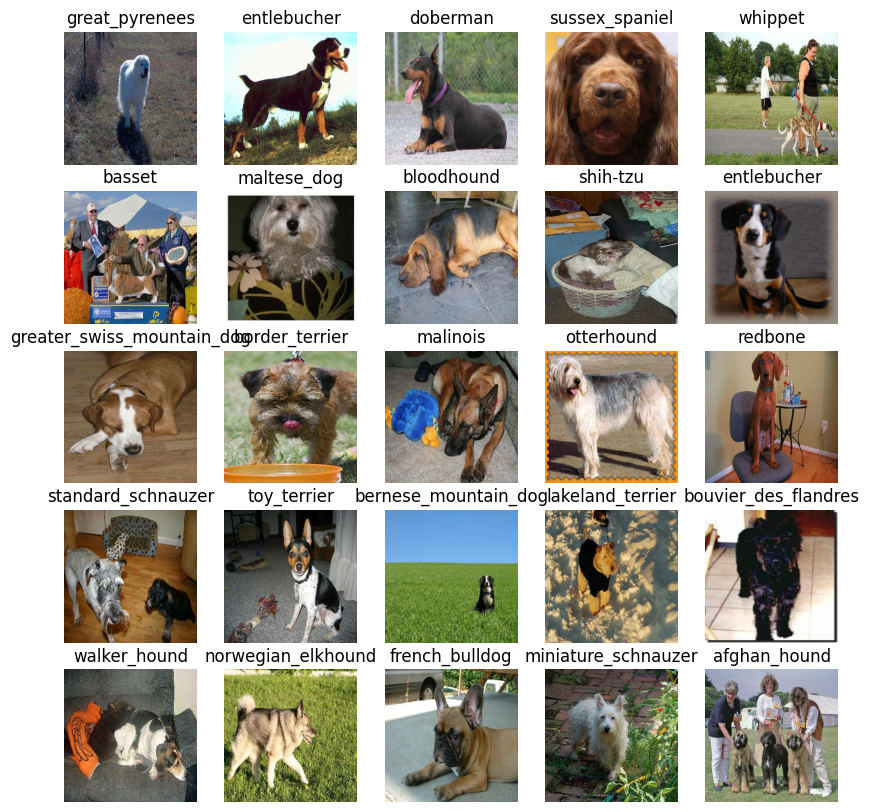

In [ ]:
show_25_images(train_images,train_labels)

In [ ]:
# Lets visualize the same for the validation dataset
val_images,val_labels=next(valid_data.as_numpy_iterator())

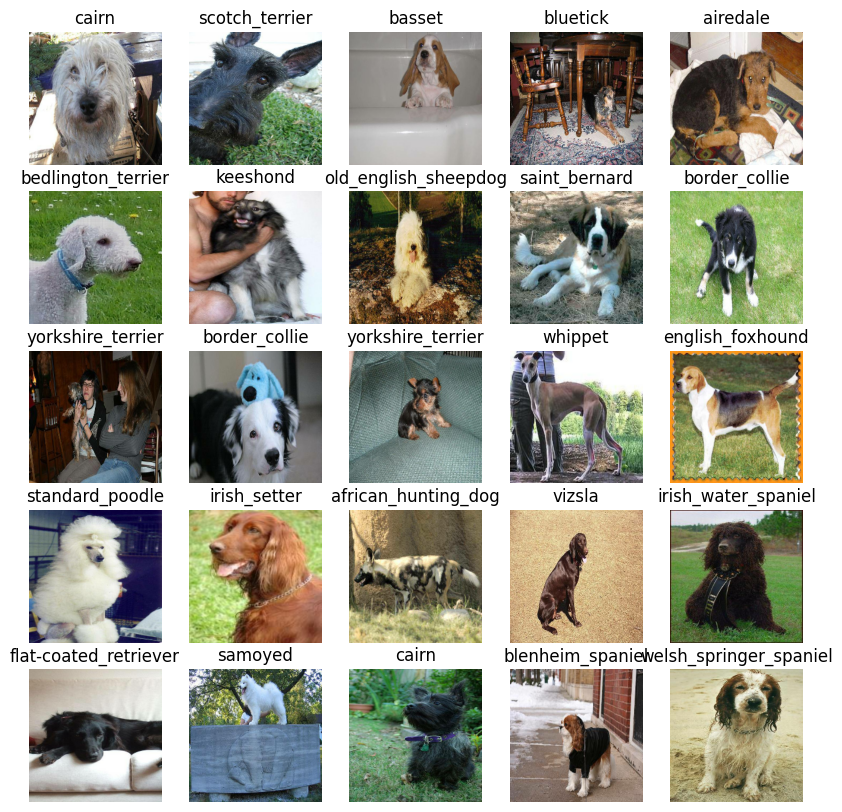

In [ ]:
## Lets plot them
show_25_images(val_images,val_labels)

## Building the Model
In order to build the model, we need to remember three things:
1. input shape - the images which are there should be in the form of tensors for processing
2. Output shape - the image labels should also be there in the form of tensors
for the model
3. The URL of the model we want to use.

In [ ]:
# set up the input shape for the model
INPUT_SHAPE=[None, IMG_SIZE,IMG_SIZE,3] # As here the shape will be int the form of (batch, height, width, color channel=3)

#set up the output shape for the model
# OUTPUT_SHAPE=120
OUTPUT_SHAPE=len(unique_breed)
MODEL_URL='https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5'

In [ ]:
len(unique_breed
    )

120

## Now we have our input shape, output shape and model url now we have to fit this in keras deep learning model
1. Take the input , output shape and model url as the parameters
2. Define the layers in keras fashion in sequential fashion (i.e. like do this , then and that)
3. Compiles the model
4. Builds the model
5. Returns the model

In [ ]:
#Lets create function to work with keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model=MODEL_URL):
  print('Building model with: ',MODEL_URL)
  ## SET THE model layers
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), #Layer1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax') #Layer2 (output layer)


  ])

  #Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']

  )
  # Build the model
  model.build(INPUT_SHAPE)
  return model



In [ ]:
model=create_model()
model.summary()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              25615849  
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 25,736,089
Trainable params: 120,240
Non-trainable params: 25,615,849
_________________________________________________________________


## Creating callbacks
callbacks are helper funcitons that model can use training do such things as save its progree, checks the progress or stops training early if the model stops improving

## TensorBoard Callbacks
We'll create two callbacks , one for tensorboard which will be used to track the model progress and another for early stopping which prevents our model from training too long.

## TensorBoard Callbacks
To set the tensorboard callbacks we need to set 3 things:
1. load the tensorbard extension
2. use the tensorboard callback to save logs in a directory and pass it to model's `fit()` function
3. visualize the model with logs using %tensorboard magic function  

In [ ]:
## 1. load the tensorboard extension
%load_ext tensorboard

In [ ]:
import datetime

def create_tensorboard_callback():
  # create a directory logs in the main folder
  logdir=os.path.join('/content/drive/MyDrive/dog-vision/logs',
                      #enter the log here
                      datetime.datetime.now().strftime('Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

## Early stopping the model
Early stopping the model helps us to avoid overfitting the model by stop training them if its not improving

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [ ]:
# create early stopping callback
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                patience=3)

## Training a model (subsets of data)
Our first model going to train only 1000 images, to check everything is working.

In [ ]:
NUM_EPOCHES=100 #@param{type:'slider',min:10,max:100,step:10}

In [ ]:
#we need to make sure that gpu is working or not
print('GPU',"avaiable :))))" if tf.config.list_physical_devices('GPU') else "sorry :(((")

GPU avaiable :))))


### Lets create a function for creating training model
As it should include:
1. create a model using `create_model()`
2. setup tensorboard callback using `create_tensorboard_callback()`
3. call the `fit()` function in the model and pass them training data, validattion data and number of epoches
4. Return the model

In [ ]:
# Build a function to trained model and then return them
def train_model():
  # create a model
  model=create_model()
  # create a new tensorboard session everytime whenever train a model
  tensorboard=create_tensorboard_callback()
  # fit the model and call the callbacks
  model.fit(x=train_data,
            epochs=NUM_EPOCHES,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  # return the fitted model
  return model

In [ ]:
#lets check then
model=train_model()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5
Epoch 1/100
25/25 [==============================] - 185s 7s/step - loss: 5.4731 - accuracy: 0.1138 - val_loss: 3.8382 - val_accuracy: 0.2400
Epoch 2/100
25/25 [==============================] - 5s 214ms/step - loss: 1.3531 - accuracy: 0.6450 - val_loss: 2.2623 - val_accuracy: 0.4900
Epoch 3/100
25/25 [==============================] - 4s 164ms/step - loss: 0.4163 - accuracy: 0.9087 - val_loss: 1.9710 - val_accuracy: 0.5650
Epoch 4/100
25/25 [==============================] - 4s 139ms/step - loss: 0.1899 - accuracy: 0.9750 - val_loss: 1.9188 - val_accuracy: 0.5600
Epoch 5/100
25/25 [==============================] - 6s 229ms/step - loss: 0.1059 - accuracy: 0.9962 - val_loss: 1.8712 - val_accuracy: 0.5800
Epoch 6/100
25/25 [==============================] - 4s 143ms/step - loss: 0.0707 - accuracy: 0.9975 - val_loss: 1.8498 - val_accuracy: 0.5700
Epoch 7/100
25/25 [==============================] - 4s 1

***Question*** : It looks like our model is overfitting because it's performing far better on the training dataset than the validation dataset , what are some ways to prevent overfitting the model in deep leaning neural networks ?

## Tensorboard Logs
Use of `%tensorboard` magic function will give access to the logs directory we created earlier and vizualise its contents.

In [ ]:
%tensorboard --logdir drive/MyDrive/dog-vision/logs

<IPython.core.display.Javascript object>

# Making predictions and evaluating the training model


In [ ]:
valid_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
predictions=model.predict(valid_data,verbose=1)

7/7 [==============================] - 11s 120ms/step


In [ ]:
len(valid_data)

7

In [ ]:
len(train_data),len(valid_data)

(25, 7)

In [ ]:
predictions

array([[7.4210805e-03, 7.4613106e-04, 1.4071111e-05, ..., 7.9955325e-06,
        3.6831558e-04, 1.1755351e-05],
       [4.9796363e-05, 8.7783556e-04, 7.0124487e-03, ..., 9.9095851e-05,
        1.7335636e-03, 8.0560558e-06],
       [5.2265528e-07, 1.1998232e-05, 2.5735219e-06, ..., 3.8663563e-07,
        1.0186925e-05, 5.4315865e-06],
       ...,
       [1.3454574e-07, 1.4575548e-06, 1.2662465e-06, ..., 1.5748122e-07,
        1.0626239e-04, 5.8926021e-06],
       [9.2209128e-05, 9.9344303e-05, 4.2138277e-06, ..., 1.1373728e-04,
        5.0406590e-05, 8.6337957e-04],
       [6.7961679e-07, 8.9370189e-08, 1.8416237e-06, ..., 2.4133349e-04,
        4.9736296e-05, 7.6693832e-05]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
np.sum(predictions[0])

1.0

Since we have used softmax activation during the creation of model it will be in the interval of (0,1)

In [ ]:
#Our first predictions
index=0
print(f"Max value: {np.max(predictions[0])}")
print(f"Sum: {np.sum(predictions[0])}")
print(f"Max Index: {np.argmax(predictions[0])}")
print(f"Predicted Label: {unique_breed[np.argmax(predictions[0])]}")


Max value: 0.25425413250923157
Sum: 1.0
Max Index: 65
Predicted Label: komondor


In [ ]:
# create a function to print the predicated label
def get_pred_label(predictions_probabilites):
  return unique_breed[np.argmax(predictions_probabilites)]

In [ ]:
print(get_pred_label(predictions[42]))

english_foxhound


Since our valid data is in batch dataset we need to unbatchify it.

In [ ]:
images_=[]
labels_=[]

for image,label in valid_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)
images_[0],labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels_[0])


'cairn'

In [ ]:
# Lets put the unbatchify into the function

def unbatchify(batch):
  images=[]
  labels=[]

  for image,label in batch.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breed[np.argmax(label)])
  return images ,labels


In [ ]:
val_images,val_labels=unbatchify(valid_data)

In [ ]:
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

Now we've got ways to get :
1. Predicted labels
2. Validation labels
3. Validation images

Lets create some function to visualize them

In [ ]:
def plot_prob(prediction_possibilities, labels,images,n=42):
  pred_prob,true_label,image= prediction_possibilities[n],labels[n],images[n]

  # get the pred label
  pred_label=get_pred_label(pred_prob)

  #Plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  #Apply the title here
  plt.title('{} {:0.2f}% {}'.format(pred_label,np.max(pred_prob)*100,true_label))

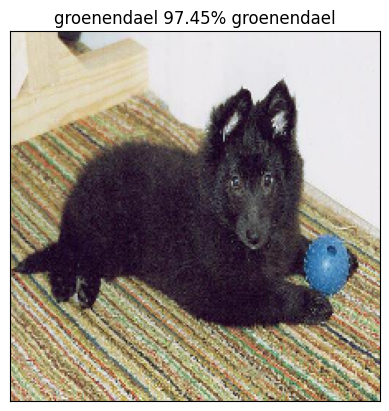

In [ ]:
plot_prob(prediction_possibilities=predictions,labels=val_labels,images=val_images,n=77)

### Lets save and run the trained model

In [ ]:
# create a function to save the model

def save_model(model, suffix=None):

  # create a model directory path name and save the model
  modeldir=os.path.join("drive/MyDrive/dog-vision/models",datetime.datetime.now().strftime('%Y%m%d-%H%M%s'))
  modelpath=modeldir+'-'+suffix+'.h5'
  print(f'saving model to {modelpath}.....')
  model.save(modelpath)
  return modelpath

In [ ]:
## Create function to load the model
def load_model(modelpath):
  print(f'loading the model from {modelpath}....')
  model= tf.keras.models.load_model(modelpath,
                                    custom_objects={'KerasLayer':hub.KerasLayer})
  return model

## Now lets check our functions whether they are working correctly

In [ ]:
# lets check saving the model
save_model(model,suffix='1000-images-mobilenetv2-Adam')

saving model to drive/MyDrive/dog-vision/models/20230816-13051692191128-1000-images-mobilenetv2-Adam.h5.....


'drive/MyDrive/dog-vision/models/20230816-13051692191128-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# Lets check whether we can load the model
loaded_1000_image_model=load_model('drive/MyDrive/dog-vision/models/20230815-14471692110825-1000-images-mobilenetv2-Adam.h5')

loading the model from drive/MyDrive/dog-vision/models/20230815-14471692110825-1000-images-mobilenetv2-Adam.h5....


In [ ]:
# evaluate the pre saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 165ms/step - loss: 1.8261 - accuracy: 0.5700


[1.8260899782180786, 0.5699999928474426]

In [ ]:
# evaluate the loaded model
loaded_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 2s 167ms/step - loss: 1.5913 - accuracy: 0.6000


[1.5912704467773438, 0.6000000238418579]

# Lets train the big or full dog dataset

In [ ]:
len(x_train)

800

In [ ]:
len(x)

10222

x contains the full training dataset as in above we have split them into training and validation dataset and then passed into the model. So here we are going to pass the entire 10222 images in data batches and gonna process it.

In [ ]:
len(y)

10222

In [ ]:
# creating data batch for x and y
full_data=create_data_batch(x,y)

creating training batches....


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

### create a model for full dataset

In [ ]:
full_model=create_model()

Building model with:  https://tfhub.dev/google/imagenet/resnet_v2_50/classification/5


In [ ]:
# create a full model tensorboard callback
full_model_tensorboard=create_tensorboard_callback()

## create a early stopping for full model
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

***Note*** :Running the cell below will take some time like around 30 minutes for first databatch as we need to load the images in gpu for processing

In [ ]:
len(full_data)

320

In [ ]:
## fit the model
full_model.fit(x=full_data,
               epochs=NUM_EPOCHES,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 47s 134ms/step - loss: 1.7038 - accuracy: 0.5977
Epoch 2/100
320/320 [==============================] - 47s 146ms/step - loss: 0.7258 - accuracy: 0.7896
Epoch 3/100
320/320 [==============================] - 40s 126ms/step - loss: 0.4884 - accuracy: 0.8460
Epoch 4/100
320/320 [==============================] - 42s 131ms/step - loss: 0.3462 - accuracy: 0.8895
Epoch 5/100
320/320 [==============================] - 42s 131ms/step - loss: 0.2593 - accuracy: 0.9166
Epoch 6/100
320/320 [==============================] - 42s 132ms/step - loss: 0.2039 - accuracy: 0.9373
Epoch 7/100
320/320 [==============================] - 41s 128ms/step - loss: 0.1625 - accuracy: 0.9482
Epoch 8/100
320/320 [==============================] - 40s 125ms/step - loss: 0.1289 - accuracy: 0.9630
Epoch 9/100
320/320 [==============================] - 42s 131ms/step - loss: 0.1011 - accuracy: 0.9709
Epoch 10/100
320/320 [==============================] - 43s 133m

## Lets save the above model

In [ ]:
save_model(full_model,suffix='full-image-set-resnetv2-Adam')

saving model to drive/MyDrive/dog-vision/models/20230816-13341692192893-full-image-set-resnetv2-Adam.h5.....


'drive/MyDrive/dog-vision/models/20230816-13341692192893-full-image-set-resnetv2-Adam.h5'

# Making predictions on test dataset

In [ ]:
## Lets load the model
loaded_full_model=load_model('drive/MyDrive/dog-vision/models/20230816-13341692192893-full-image-set-resnetv2-Adam.h5')

loading the model from drive/MyDrive/dog-vision/models/20230816-13341692192893-full-image-set-resnetv2-Adam.h5....


In [ ]:
testpath='drive/MyDrive/dog-vision/test'
os.listdir(testpath)

['e383a31009f0779536d43816c10bf662.jpg',
 'dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 'e218c0da622fedc975a97999ad7d48a5.jpg',
 'e241bfdd5cc6154698394905abaa0d76.jpg',
 'e40a39dd88f04b29ab3cb3a986503f8f.jpg',
 'dd703c7beeaf5cba5533d5f42b608f2e.jpg',
 'e0e3eb01e80b1d694a47b23909e158ec.jpg',
 'e6a544a538088cc3f73b432a2da90134.jpg',
 'dea5b2d047b3cb7ce13234140c7bf5aa.jpg',
 'e079440ee0061b92ec22faf17be13908.jpg',
 'e2a9a7580a1424bc6531b2b7375338db.jpg',
 'eceb457b878bc73e565b0efa002d5563.jpg',
 'ea5977763e3e8b39f8ea8c28565d32e3.jpg',
 'eac3503b463e275d9f3053b8fcd5a58a.jpg',
 'ec0a814cc971dbe6e618a9a37ba355f8.jpg',
 'e9d0bcd1ca3f651f6693de92d63bce5c.jpg',
 'efe3a7327992dafcaf30dc3bfae29473.jpg',
 'f0fc06a2b2123325e34a2450d3202853.jpg',
 'ecba66c5313a2a5fd4017a039a9501b6.jpg',
 'eb9aebedf9ed7d768a5afb36cd0e2436.jpg',
 'eb44625ed1113825fe1f23e50222cca1.jpg',
 'ef7462aaef0907fbe406e23a4462f086.jpg',
 'ed0ec7befaa38726a118ab7e4d53b332.jpg',
 'f328ba9a36da80caceea391ed1a87164.jpg',
 'f4db24d71e6f31

In [ ]:
## lets create the filenames
testpath='drive/MyDrive/dog-vision/test/'
testfilenames=[testpath+fname for fname in os.listdir(testpath)]
testfilenames[:10]

['drive/MyDrive/dog-vision/test/e383a31009f0779536d43816c10bf662.jpg',
 'drive/MyDrive/dog-vision/test/dd2228d2fbb3ddc8fb350106c2d989ef.jpg',
 'drive/MyDrive/dog-vision/test/e218c0da622fedc975a97999ad7d48a5.jpg',
 'drive/MyDrive/dog-vision/test/e241bfdd5cc6154698394905abaa0d76.jpg',
 'drive/MyDrive/dog-vision/test/e40a39dd88f04b29ab3cb3a986503f8f.jpg',
 'drive/MyDrive/dog-vision/test/dd703c7beeaf5cba5533d5f42b608f2e.jpg',
 'drive/MyDrive/dog-vision/test/e0e3eb01e80b1d694a47b23909e158ec.jpg',
 'drive/MyDrive/dog-vision/test/e6a544a538088cc3f73b432a2da90134.jpg',
 'drive/MyDrive/dog-vision/test/dea5b2d047b3cb7ce13234140c7bf5aa.jpg',
 'drive/MyDrive/dog-vision/test/e079440ee0061b92ec22faf17be13908.jpg']

In [ ]:
len(testfilenames)

10357

In [ ]:
# lets create the data batch
test_data=create_data_batch(testfilenames,test_data=True)

creating test batches.....


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
test_predictions=loaded_full_model.predict(test_data,
                                           verbose=1)

324/324 [==============================] - 287s 856ms/step


In [ ]:
## now lets save them in the csv file so thawt we can access them further
np.savetxt('drive/MyDrive/dog-vision/pred_arrays.csv',test_predictions,delimiter=',')

In [ ]:
# load predictions fro csv file
tst_predictions=np.loadtxt('drive/MyDrive/dog-vision/pred_arrays.csv',delimiter=',')

In [ ]:
len(tst_predictions)

10357

In [ ]:
tst_predictions.shape

(10357, 120)